## Dominik Adamczyk
### Mownit Lab3 rozwiązania

1. W jednej tabeli języka R należy umieścić wyniki dwóch różnych eksperymentów (t.j. czas działania dwóch różnych funkcji) dla różnych parametrów (t.j. rozmiarów wektora(macierzy)). Tabela powinna zawierać dane z 10-krotnego uruchomienia tego samego eksperymentu dla tych samych parametrów (dla każdego takiego zestawu)  **(1p.)**

In [120]:
library("tidyverse")

In [121]:
results <- read_csv("times.csv")

Rows: 600 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Type
dbl (2): Size, Time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [122]:
head(results)
tail(results)

Type,Size,Time
<chr>,<dbl>,<dbl>
Dot_Product,5e+05,0.0020225
Dot_Product,5e+05,0.0022960
Dot_Product,5e+05,0.0124391
Dot_Product,5e+05,0.0020111
Dot_Product,5e+05,0.0022763
Dot_Product,5e+05,0.0025787


Type,Size,Time
<chr>,<dbl>,<dbl>
Mat_Mult,15000,0.6204896
Mat_Mult,15000,0.5214246
Mat_Mult,15000,0.5226759
Mat_Mult,15000,0.5184071
Mat_Mult,15000,0.5199034
Mat_Mult,15000,0.5400072


2. Należy przedstawić wykresy średnich czasów obliczenia wybranych funkcji w zależności od rozmiaru wektora (macierzy) **(1p.)**

In [123]:
agv_res <- results %>% 
    group_by(Type, Size) %>%
    summarise(
        Time_sd = sd(Time),
        Time_mean = mean(Time),
    )  %>% 
    arrange(Type, Size)

head(agv_res)
tail(agv_res)


`summarise()` has grouped output by 'Type'. You can override using the
`.groups` argument.


Type,Size,Time_sd,Time_mean
<chr>,<dbl>,<dbl>,<dbl>
Dot_Product,500000,0.004300920,0.00420504
Dot_Product,1000000,0.002481234,0.00525260
Dot_Product,1500000,0.002023741,0.00809236
Dot_Product,2000000,0.002277047,0.00996234
Dot_Product,2500000,0.003019627,0.01347734
Dot_Product,3000000,0.002488698,0.01453611


Type,Size,Time_sd,Time_mean
<chr>,<dbl>,<dbl>,<dbl>
Mat_Mult,12500,0.01497827,0.3570114
Mat_Mult,13000,0.01041267,0.3965283
Mat_Mult,13500,0.01059025,0.4159463
Mat_Mult,14000,0.01535042,0.4646168
Mat_Mult,14500,0.02794917,0.5094114
Mat_Mult,15000,0.04955086,0.5460462


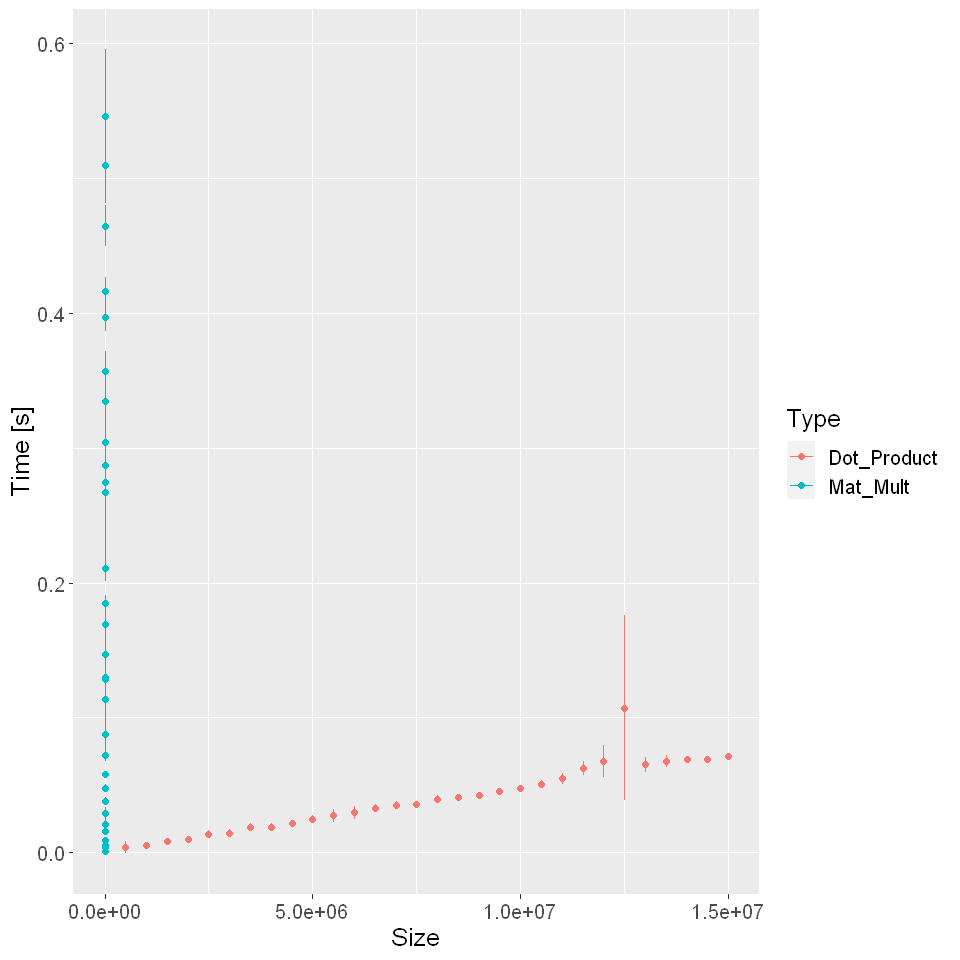

In [124]:
options(repr.plot.width=8, repr.plot.height=8)
plot <- ggplot(agv_res, aes(Size, Time_mean, color=Type)) + geom_point() + ylab("Time [s]") + 
    geom_errorbar(aes(ymin = Time_mean-Time_sd, ymax = Time_mean+Time_sd, width=.25)) +
theme(text = element_text(size=15))
plot


Pojedynczy wykres jest bardzo nieczytelny ze względu na różnice w parametrach Size dla Dot_product i Mat_Mult. Dlatego podzielę dane i będę je prezentował na osobnych wykresach. 

In [125]:
agv_dot <- agv_res %>% filter(Type=="Dot_Product")
head(agv_dot)
tail(agv_dot)

Type,Size,Time_sd,Time_mean
<chr>,<dbl>,<dbl>,<dbl>
Dot_Product,500000,0.004300920,0.00420504
Dot_Product,1000000,0.002481234,0.00525260
Dot_Product,1500000,0.002023741,0.00809236
Dot_Product,2000000,0.002277047,0.00996234
Dot_Product,2500000,0.003019627,0.01347734
Dot_Product,3000000,0.002488698,0.01453611


Type,Size,Time_sd,Time_mean
<chr>,<dbl>,<dbl>,<dbl>
Dot_Product,12500000,0.068442075,0.10739422
Dot_Product,13000000,0.005483218,0.06526356
Dot_Product,13500000,0.004595141,0.06786494
Dot_Product,14000000,0.002150920,0.06895387
Dot_Product,14500000,0.001006413,0.06917367
Dot_Product,15000000,0.001443172,0.07144153


In [126]:
agv_mult <- agv_res %>% filter(Type=="Mat_Mult")
head(agv_mult)
tail(agv_mult)

Type,Size,Time_sd,Time_mean
<chr>,<dbl>,<dbl>,<dbl>
Mat_Mult,500,0.0001294671,0.00067511
Mat_Mult,1000,0.0048992364,0.00372145
Mat_Mult,1500,0.0019959813,0.00533766
Mat_Mult,2000,0.0021272264,0.00954936
Mat_Mult,2500,0.0025713401,0.01594271
Mat_Mult,3000,0.0038115053,0.02094238


Type,Size,Time_sd,Time_mean
<chr>,<dbl>,<dbl>,<dbl>
Mat_Mult,12500,0.01497827,0.3570114
Mat_Mult,13000,0.01041267,0.3965283
Mat_Mult,13500,0.01059025,0.4159463
Mat_Mult,14000,0.01535042,0.4646168
Mat_Mult,14500,0.02794917,0.5094114
Mat_Mult,15000,0.04955086,0.5460462


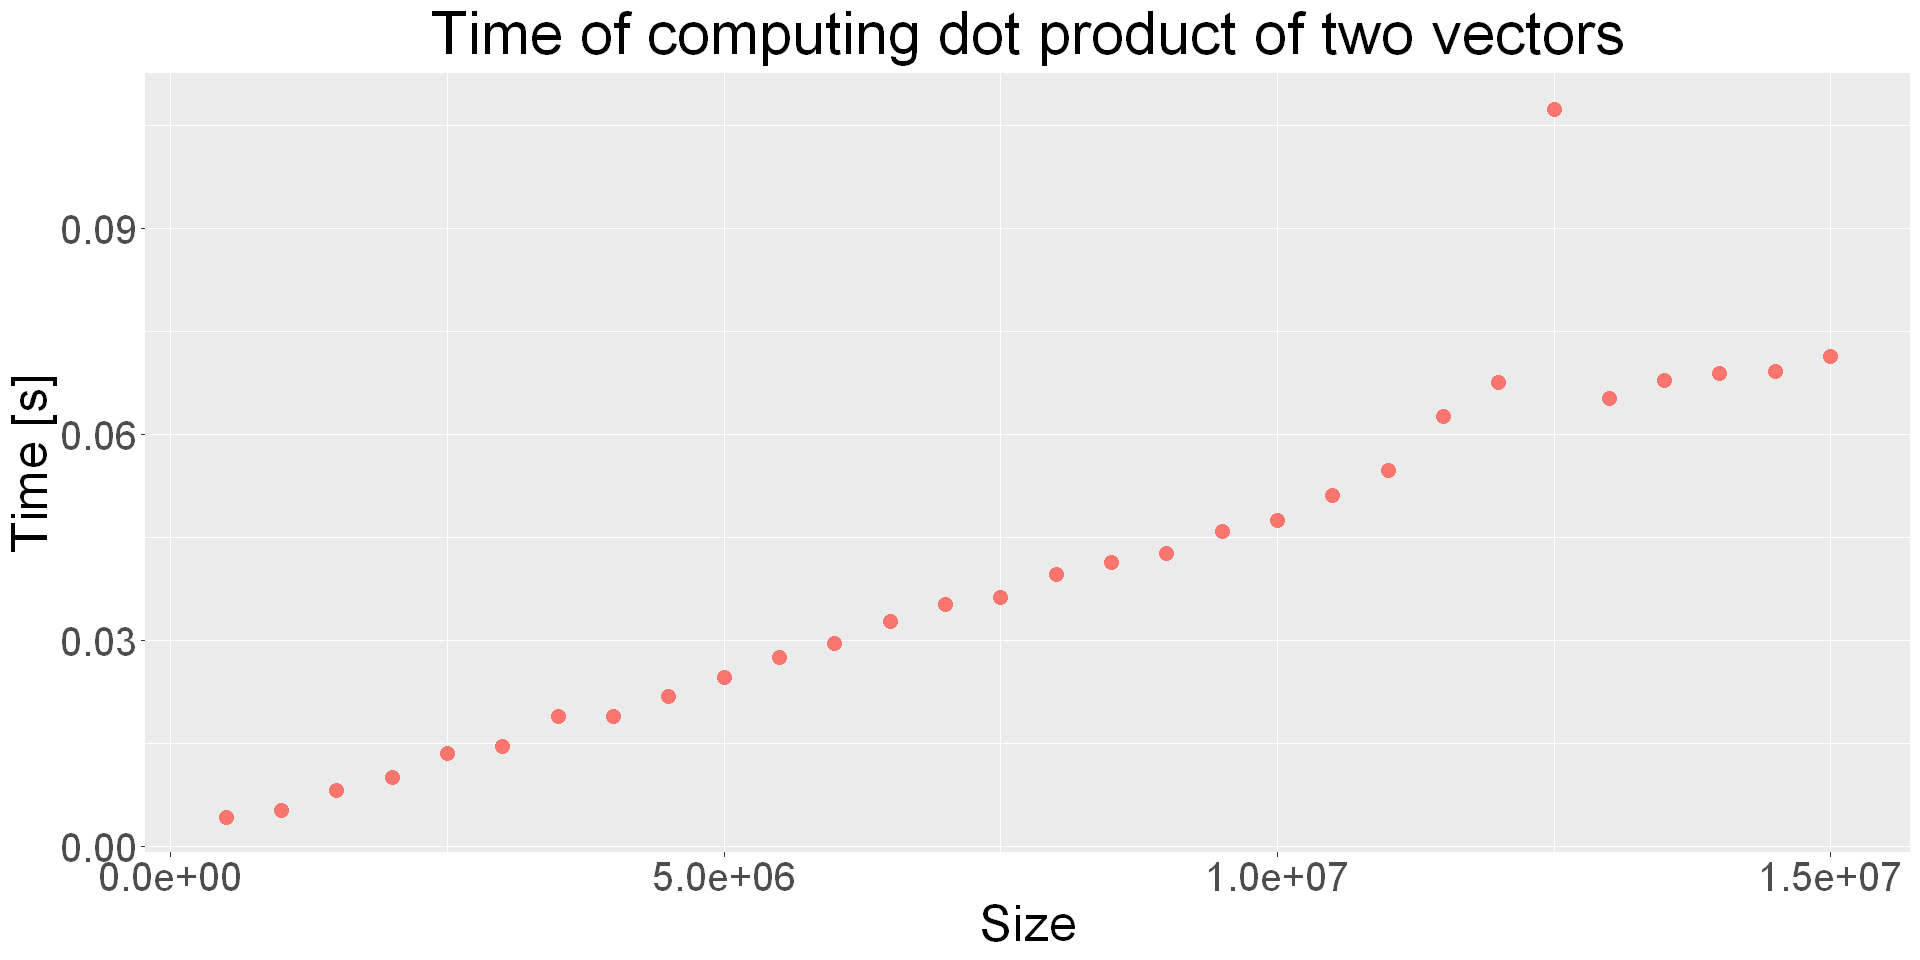

In [127]:
options(repr.plot.width=16, repr.plot.height=8)

plot_dot <- ggplot(agv_dot, aes(Size, Time_mean)) +
            geom_point(size=4, color = "#F8766D") +
            ylab("Time [s]") + 
            ggtitle("Time of computing dot product of two vectors") +
            theme(text = element_text(size=30), plot.title = element_text(hjust = 0.5))
plot_dot

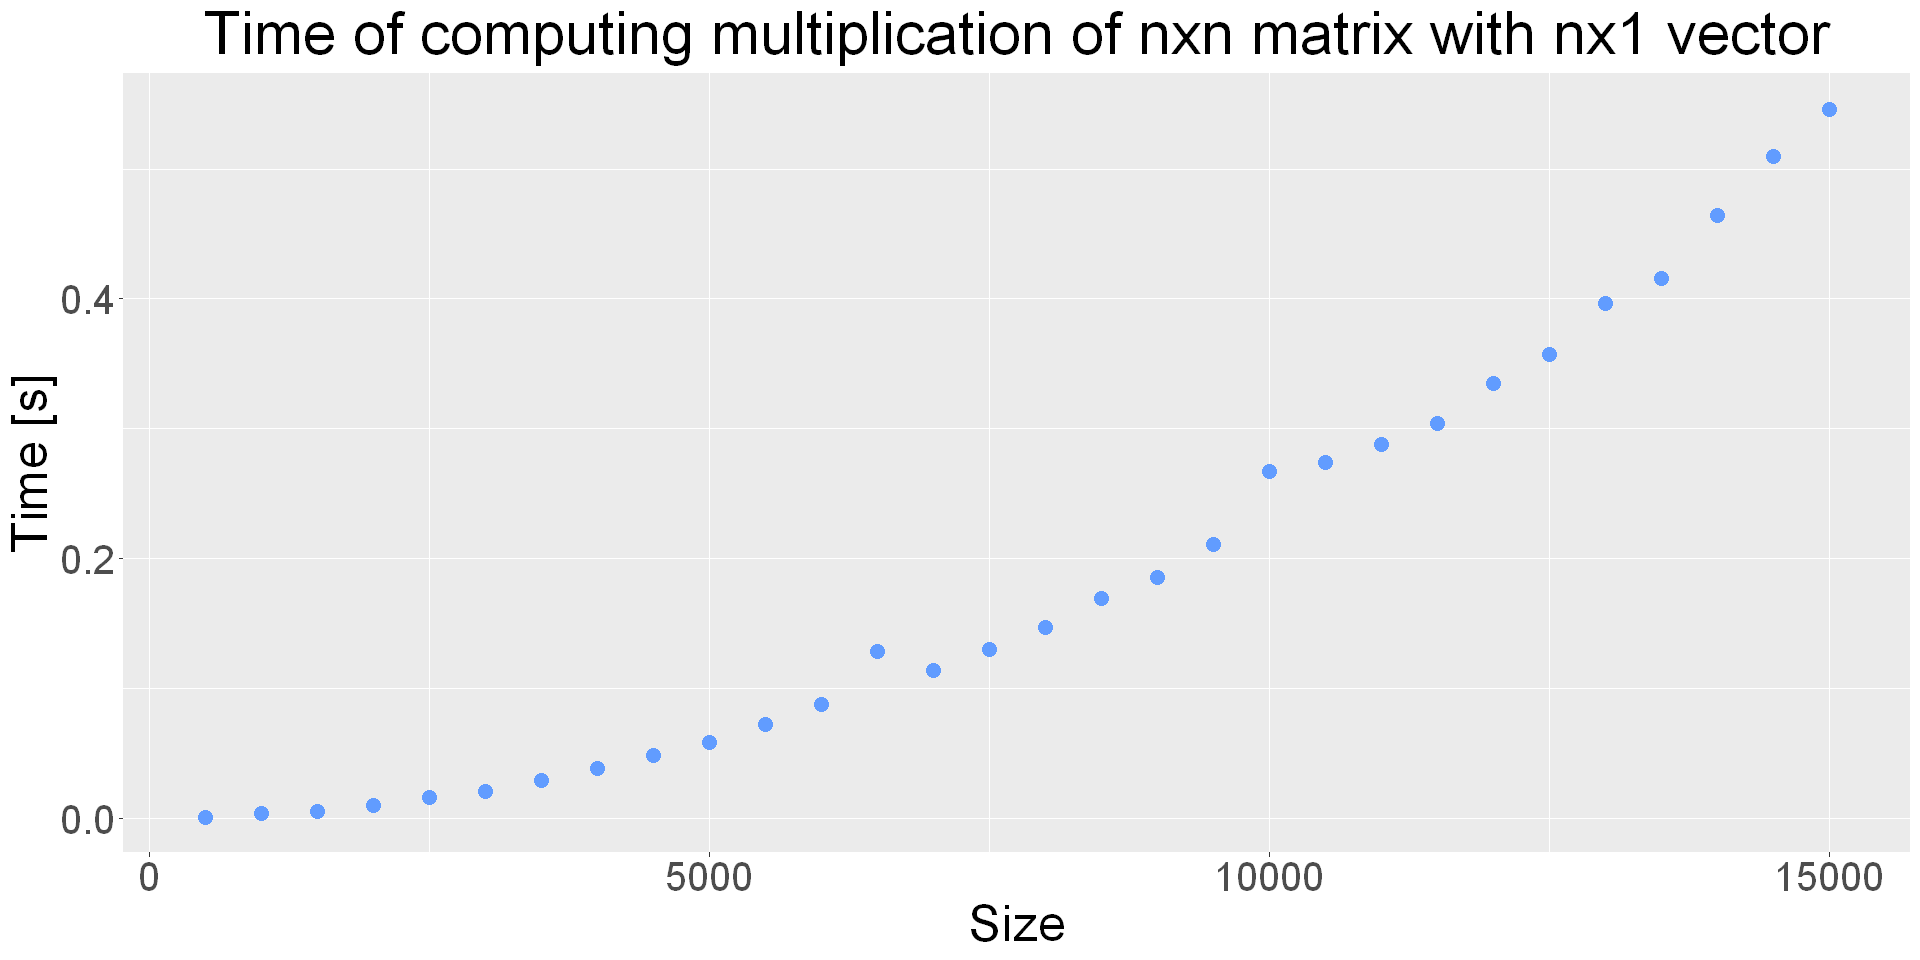

In [128]:
plot_mult <- ggplot(agv_mult, aes(Size, Time_mean, color = Type)) +
             geom_point(size=4, color="#619CFF") +
             ylab("Time [s]") + 
             ggtitle("Time of computing multiplication of nxn matrix with nx1 vector") +
             theme(text = element_text(size=30), plot.title = element_text(hjust = 0.5))
plot_mult

3. Wykresy powinny zawierać informację o odchyleniu standardowym dla uzyskanych wyników (słupki błędów)  **(1p.)**

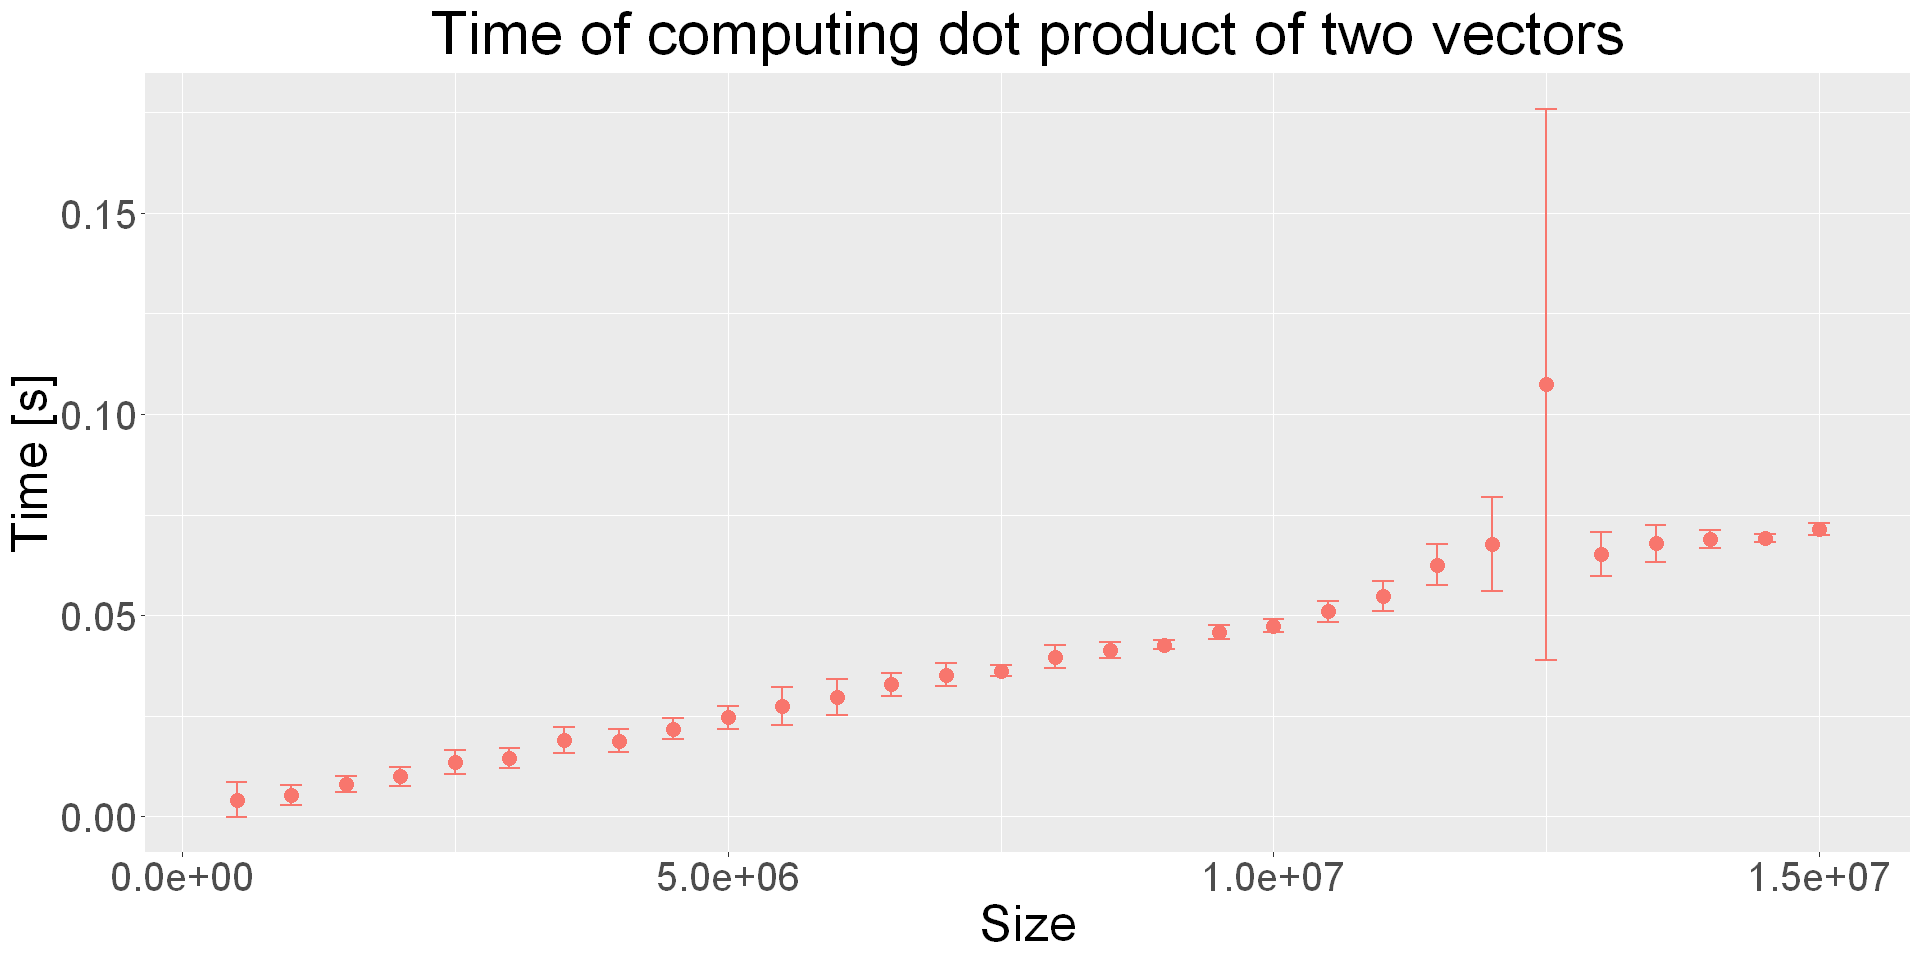

In [129]:
plot_dot + geom_errorbar(aes(ymin = Time_mean-Time_sd, ymax = Time_mean+Time_sd, width=2e5), color = "#F8766D", size = 0.7)

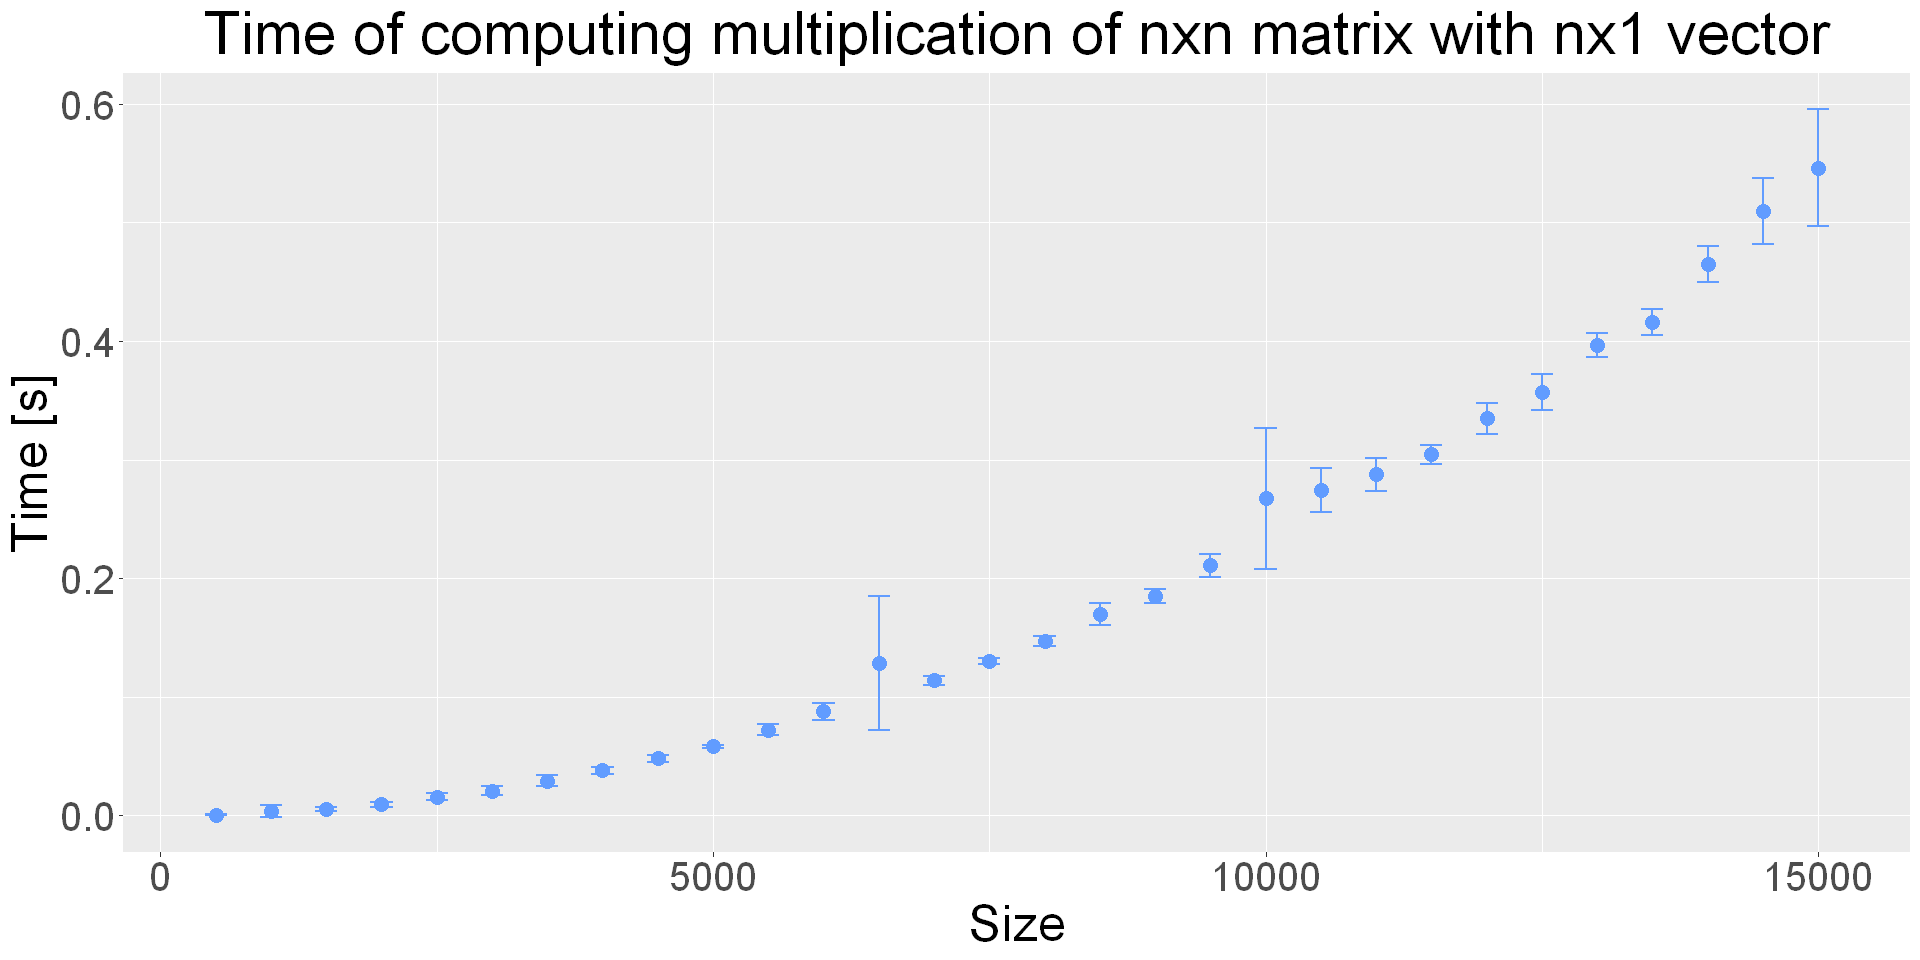

In [130]:
plot_mult + geom_errorbar(aes(ymin = Time_mean-Time_sd, ymax = Time_mean+Time_sd, width=2e2), color = "#619CFF", size = 0.7)